In [1]:
# 서울시 공공도서관 위치를 지도에 출력해보는 예제
# 한글처리
import matplotlib.pyplot as plt
import numpy as np
import warnings
import csv
import pandas as pd
# 데이터시각화 tool
from plotnine import * # r의 ggplot2 시각화패키지를 python에서도 사용
import folium
import re

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

library = pd.read_csv('./data/서울시 공공도서관 현황정보.csv',delimiter=',', encoding='cp949')
display(library)

,도서관 일련번호,도서관명,구 코드,구명,주소,전화번호,홈페이지 URL,운영시간,정기 휴관일,도서관 구분,도서관 구분명,위도,경도
0,1935,강남구립못골도서관,8,강남구,서울특별시 강남구 자곡로 116,02-459-5522,http://library.gangnam.go.kr/mglib,"평일 : 09:00~22:00, 주말 : 09:00~22:00",매주 화요일 및 법정공휴일,1,공공도서관,37.471538,127.096582
1,1066,강남역삼푸른솔도서관,8,강남구,서울특별시 강남구 테헤란로8길 36. 4층,02-2051-1178,https://library.gangnam.go.kr/ysplib/index.do,"평일 : 09:00~18:00, 주말 : 09:00~17:00",매주 화요일 및 법정 공휴일,1,공공도서관,37.496497,127.032027
2,2815,개포하늘꿈도서관,8,강남구,서울특별시 강남구 개포로 110길 54,02-451-1511,https://library.gangnam.go.kr/hnkklib/,"평일 : 09:00~22:00, 주말 : 09:00~17:00",매주 화요일 및 법정공휴일,1,공공도서관,37.490669,127.080357
3,48,논현도서관,8,강남구,서울특별시 강남구 학동로43길 17(논현동) 논현2동주민센터 6층,02-3443-7650,https://library.gangnam.go.kr/nhlib,"평일 : 09:00~22:00, 주말 : 09:00~17:00",매주 화요일 및 법정공휴일,1,공공도서관,37.517278,127.037188
4,49,대치도서관,8,강남구,서울특별시 강남구 삼성로 212 은마아파트 복지상가 2층 215호,02-565-6666,https://library.gangnam.go.kr/dchlib/index.do,평일 : 09:00~21:00. 주말 : 09:00~17:00,매주 화요일 및 법정공휴일,1,공공도서관,37.499616,127.065915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2144,양원숲속도서관,20,중랑구,서울특별시 중랑구 송림길 172(망우동),02-432-0710,http://www.jungnanglib.seoul.kr/ywlib/,"평일 : 09:00~18:00, 주말 : 토:09:00?17:00, 일:10:00~...","매주 월요일, 법정공휴일 및 근로자의날(5월1일), 창립기념일(12월1일)",1,공공도서관,37.602663,127.103926
202,29,중랑구립면목정보도서관,20,중랑구,서울특별시 중랑구 면목로 397(면목동),02-432-4123,http://www.jungnanglib.seoul.kr/mmlib/,"평일 : 09:00~22:00(월요일은 09:00~17:00), 주말 : 09:00...","매월 쳇째, 셋째 월요일, 법정공휴일 및 근로자의날(5월1일), 창립기념일(12월1일)",1,공공도서관,37.587354,127.087554
203,28,중랑구립정보도서관,20,중랑구,서울특별시 중랑구 신내로15길 197(묵동),02-490-9112~4,http://www.jungnanglib.seoul.kr,"평일 : 09:00~22:00(월요일은 09:00~18:00), 주말 : 09:00...","매월 둘째, 넷째 월요일, 법정공휴일 및 근로자의날(5월1일), 창립기념일(8월12일)",1,공공도서관,37.615171,127.086906
204,2638,중랑상봉도서관,20,중랑구,서울특별시 중랑구 동일로114길 10(상봉동),02-2209-0094,http://www.jungnanglib.seoul.kr/sblib/index.php,"평일 : 09:00~22:00(유아어린이자료실 09:00~18:00, 스마트라운지:...","매주 월요일, 법정공휴일 및 근로자의날(5월1일), 창립기념일(8월12일)",1,공공도서관,37.593096,127.078711


In [3]:
result=library["구명"].value_counts()
display(result)

구명
강남구     16
성북구     13
구로구     12
송파구     12
강동구     10
양천구     10
종로구      9
노원구      9
동대문구     9
서초구      9
강서구      9
도봉구      9
동작구      8
중구       8
은평구      8
광진구      7
성동구      7
강북구      7
영등포구     6
마포구      6
관악구      5
중랑구      5
용산구      4
서대문구     4
금천구      4
Name: count, dtype: int64

<Axes: xlabel='경도', ylabel='위도'>

findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding'

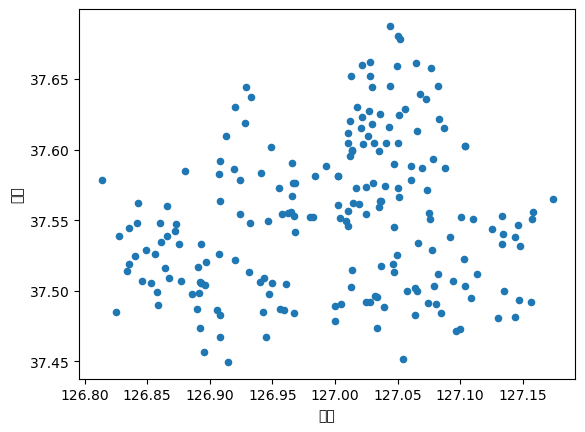

In [6]:
## 1) scatter, library => 시각화(위치)
# 제 컴퓨터가 한글처리가안되서 이렇게보내요!!
library.plot.scatter(x="경도",y="위도")

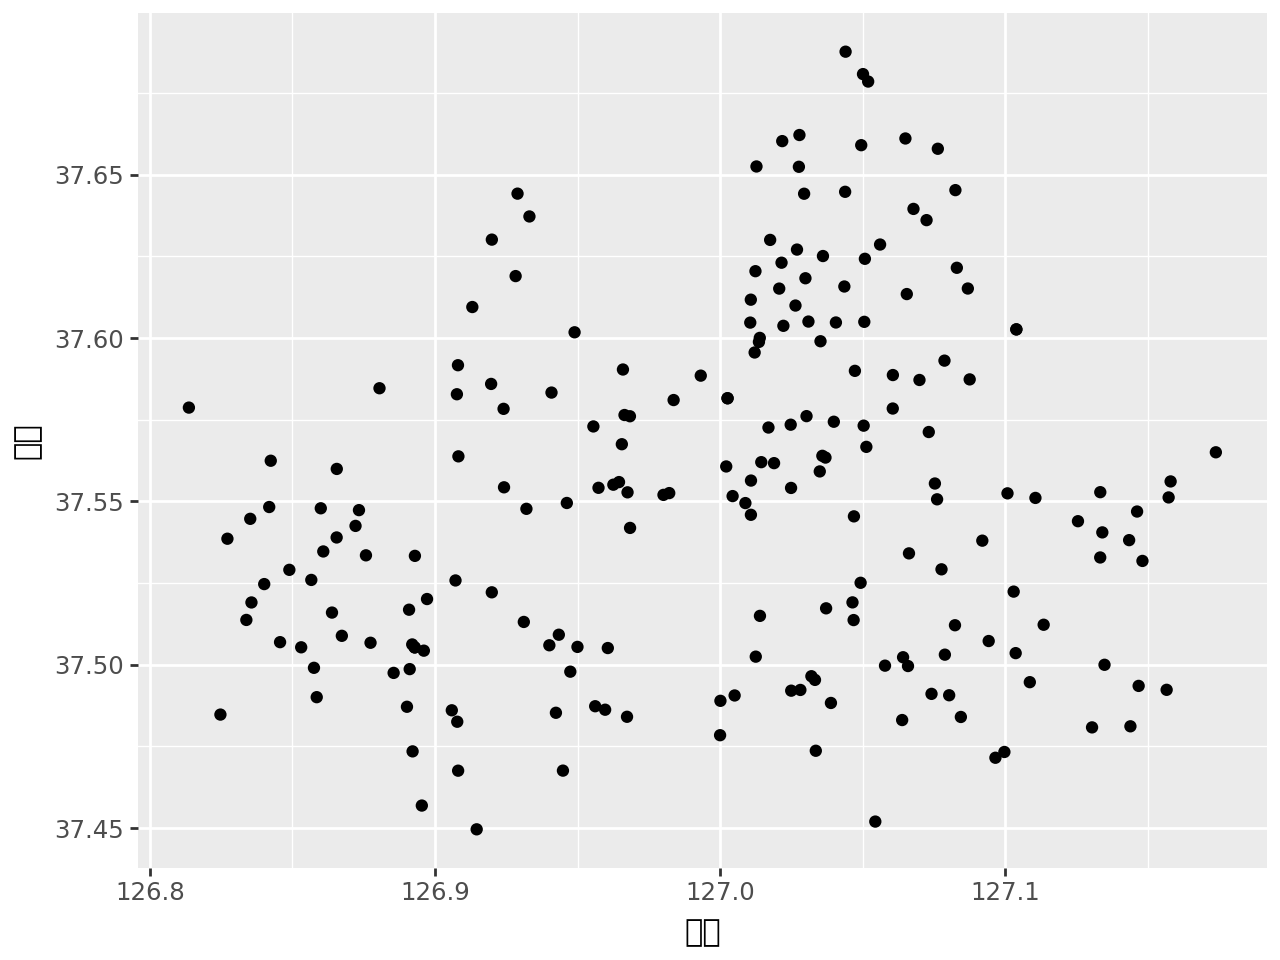

In [7]:
# 2) plotnine, ggplot2
from plotnine import ggplot, aes, geom_point

(ggplot(library, aes(x="경도", y="위도")) 
+ geom_point())

In [14]:
import folium
# 3) folium으로 시각화
lng = library.위도.mean()
lat = library.경도.mean()
m = folium.Map(location=[lng, lat], zoom_start=12)

for lib in library.index:
    library_info = (library.loc[lib, '도서관명'] + '-' + library.loc[lib, '주소'] + 
                    '전화번호 : ' + str(library.loc[lib, '전화번호']) + 
                     '운영시간 : ' + str(library.loc[lib, '운영시간']) + 
                     '정기 휴관일 : ' + str(library.loc[lib, '정기 휴관일']))
    icon_color="blue"
    folium.CircleMarker(
        location = [library.loc[lib,"위도"],library.loc[lib,"경도"]],
        popup = folium.Popup(library_info, max_width=300),
        color=icon_color,
        fill_color=icon_color
    ).add_to(m)
m
# 팝업 내용은 library_info로 팝업 창의 너비는 300으로 해주세요!
# fill, radius, icon_color 옵션은 마음대로 설정!!!
# library_info = (library.loc[lib, '도서관명'] + '-' + library.loc[lib, '주소'] + 
#                     '전화번호 : ' + str(library.loc[lib, '전화번호']) + 
#                     '운영시간 : ' + str(library.loc[lib, '운영시간']) + 
#                     '정기 휴관일 : ' + str(library.loc[lib, '정기 휴관일']))